In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ["id", "diagnosis", "mean_radius", "mean_texture", "mean_perimeter", "mean_area", "mean_smoothness", 
                "mean_compactness", "mean_concavity", "mean_concave_points", "mean_symmetry", "mean_fractal_dimension", 
                "se_radius", "se_texture", "se_perimeter", "se_area", "se_smoothness", "se_compactness", 
                "se_concavity", "se_concave_points", "se_symmetry", "se_fractal_dimension", 
                "worst_radius", "worst_texture", "worst_perimeter", "worst_area", "worst_smoothness", 
                "worst_compactness", "worst_concavity", "worst_concave_points", "worst_symmetry", "worst_fractal_dimension"]
data = pd.read_csv(url, header=None, names=column_names)

data = data.drop("id", axis=1)

data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

#split into train and test sets

X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
len(data)

569

In [2]:
#Preproccess data by scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [3]:
#Train logistic regression model on training set
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)


LogisticRegression()

In [4]:
# Make predictions and calculate ROC and Precision-Recall curves
from sklearn.metrics import roc_curve, precision_recall_curve

y_prob = lr.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)


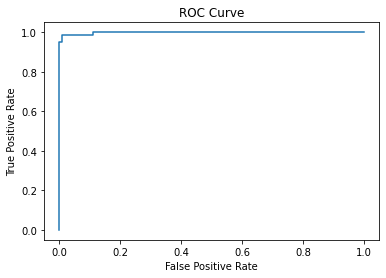

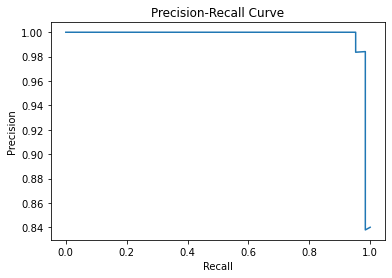

In [5]:
import matplotlib.pyplot as plt

#Plot the curves
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
